In [9]:
import numpy as np
import keras
import torchvision
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from keras.layers import *
from keras import *
import matplotlib.pyplot as plt

In [2]:
# Loading data
(features_train, labels_train), (features_test, labels_test) = keras.datasets.fashion_mnist.load_data()

In [7]:
print ("Shape of train data: ", features_train.shape)
print ("Shape of test data: ", features_test.shape)


Shape of train data:  (60000, 28, 28)
Shape of test data:  (10000, 28, 28)


In [47]:
# Building model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.mp = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4)
        self.mp2 = nn.MaxPool2d(kernel_size=3)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=5)
        self.fc1 = nn.Linear(100, 100)
        self.fc2 = nn.Linear(100,10)
    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.mp(out)
        out = F.relu(self.conv2(out))
        out = self.mp2(out)
        out = F.relu(self.conv3(out))
        out = out.view(x.size(0),-1)
        out = F.relu(self.fc1(out))
        out = F.softmax(self.fc2(out), dim=1)
        return out

In [32]:
net = Net()
optimizer = torch.optim.Adam(net.parameters())
loss = nn.NLLLoss()

In [10]:
x_train = Variable(torch.from_numpy(features_train)).float()
x_test = Variable(torch.from_numpy(features_test)).float()

In [42]:
x_train = x_train.unsqueeze(1)

In [9]:
features_train = features_train.reshape(-1, 1, 28,28)
labels_train = utils.to_categorical(labels_train, num_classes=10)

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, input_shape=(28,28,1), activation="relu", data_format='channels_last'))
model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size=3, activation="relu"))
model.add(Flatten(data_format='channels_last'))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=['acc'])

In [13]:
model

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 26, 26)        17280032  
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 13, 26)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 11, 64)        15040     
_________________________________________________________________
flatten_1 (Flatten)          (None, 9856)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               985700    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 18,281,782
Trainable params: 18,281,782
Non-trainable params: 0
________________________________________________________________

In [26]:
features_train = features_train.reshape(-1, 28,28, 1)

In [29]:
features_train.shape
labels_train = utils.to_categorical(labels_train, num_classes=10)

In [33]:
net

Net(
  (conv1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
  (mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (mp2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=100, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [4]:
x_train.shape

NameError: name 'x_train' is not defined

In [19]:
x_train/=255

In [23]:
x_train.shape

torch.Size([60000, 28, 28])

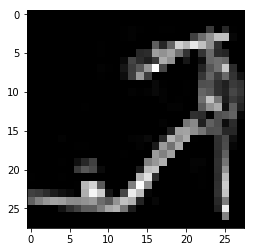

In [12]:
plt.imshow(features_train[8], cmap="gray")

In [8]:
labels_train[5]

2